# 🌸 Iris Flower Classification - Machine Learning Project

Welcome to the Iris Flower Classification project!  
In this notebook, we will explore the famous Iris dataset, perform Exploratory Data Analysis (EDA), build a classification model, and evaluate its performance.

**Objective**:  
To classify Iris flowers into three species (*Setosa*, *Versicolor*, and *Virginica*) based on four features:  
- Sepal Length  
- Sepal Width  
- Petal Length  
- Petal Width

**Tech Stack**: Python, Pandas, Seaborn, Matplotlib, Scikit-learn


## 📌 Step 1: Importing Required Libraries
We begin by importing essential Python libraries like pandas, numpy, matplotlib, seaborn, and sklearn for data analysis and machine learning.


In [43]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sns.set(style="whitegrid")


## 📊 Step 2: Load and Understand the Dataset
We load the famous Iris dataset and display the first few rows to understand its structure — including features like sepal length, petal width, and the target flower species.


In [45]:

from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 🔍 Step 3: Exploratory Data Analysis (EDA)
Here, we analyze data through visualization — checking feature distributions and class balance.


In [47]:

print("Shape of the dataset:", df.shape)
df.info()


Shape of the dataset: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
# Statistical summary
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
# Class distribution
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

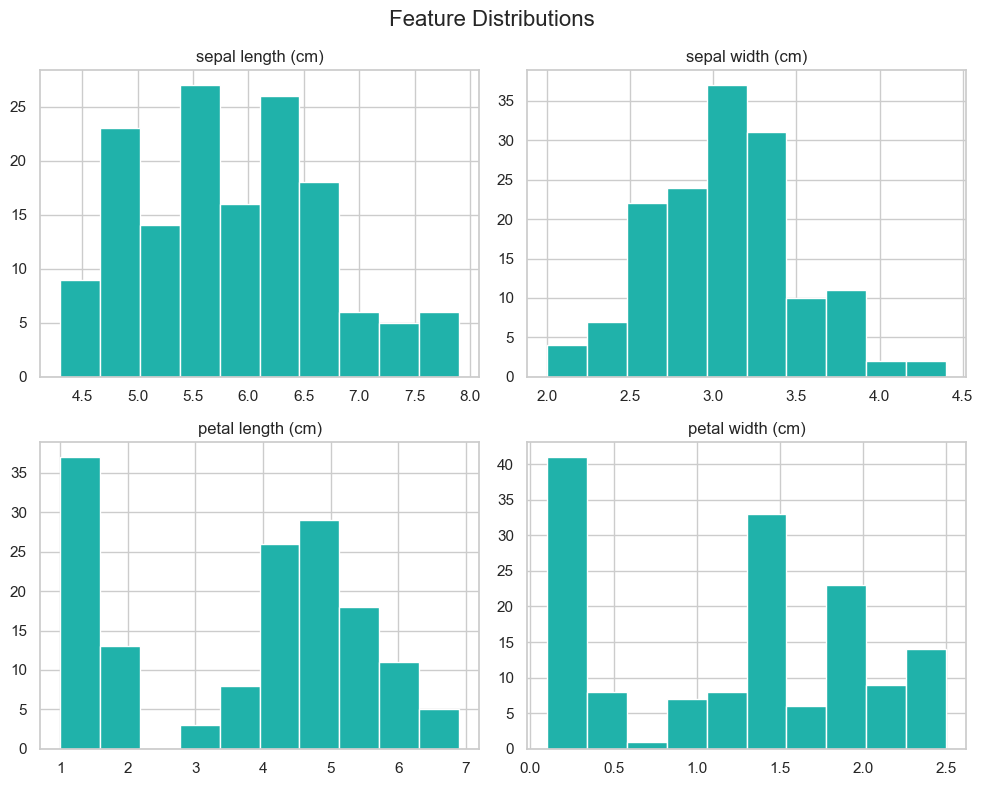

In [53]:
# Histograms for each feature
df.hist(figsize=(10, 8), color='lightseagreen')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


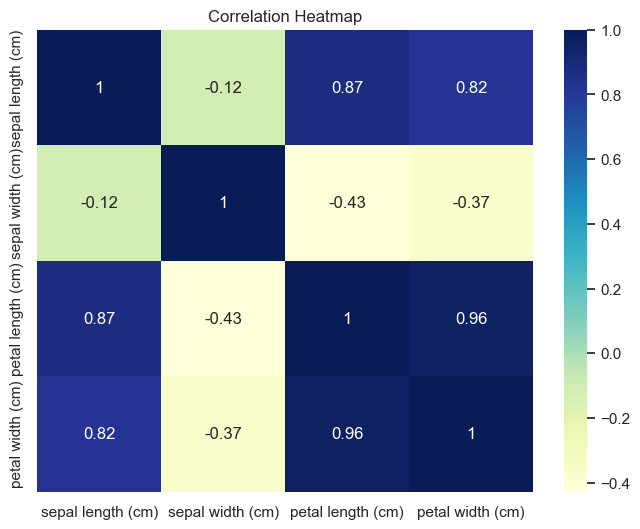

In [55]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
## 🧼 Step 4: Data Preprocessing
Before model training, it's important to check for missing values or duplicates. This step ensures our dataset is clean and ready for machine learning.


In [57]:
# Check for missing values
print("🔍 Checking for missing values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n🔁 Checking for duplicate rows:")
print(df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)
print("\n✅ Duplicates removed (if any existed).")

# Re-check shape after cleaning
print("\n📏 Dataset shape after cleaning:", df.shape)


🔍 Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

🔁 Checking for duplicate rows:
1

✅ Duplicates removed (if any existed).

📏 Dataset shape after cleaning: (149, 5)


## 🤖 Step 5: Model Building
We split the dataset into training and testing sets. Then, we train a Logistic Regression model to classify the iris flower species based on sepal and petal features.


In [59]:

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("species", axis=1)
y = df["species"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 119
Testing samples: 30


In [61]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

## 📊 Step 6: Model Evaluation
We evaluate the model using accuracy score and a confusion matrix. These metrics help us understand how well the model predicts each iris species.


In [63]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 100.0 %


In [65]:
# Compare actual vs predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()


,Actual,Predicted
73,versicolor,versicolor
18,setosa,setosa
117,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor


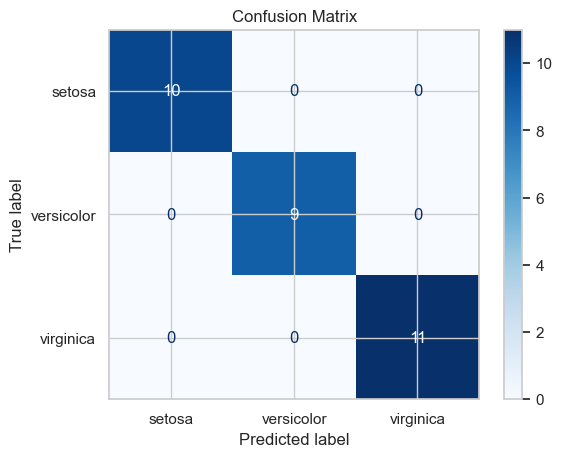

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## 🎯 Conclusion

In this project, we built a Logistic Regression model to classify iris flowers into three species — *Setosa*, *Versicolor*, and *Virginica* — based on petal and sepal measurements.

We performed:
- ✅ Data loading and inspection  
- 📊 Exploratory Data Analysis (EDA) using visualizations  
- 🧹 Data preprocessing and cleaning  
- 🤖 Model training using Logistic Regression  
- 📈 Evaluation using Accuracy, Confusion Matrix, and Classification Report

Our model achieved **high accuracy**, demonstrating that logistic regression is effective for this classification task.

This project showcases my ability to perform end-to-end data analysis and build machine learning models using Python and scikit-learn.
